In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as ss
from fredapi import Fred
import datetime as dt

In [2]:
sns.set_style('whitegrid')
plt.style.use('seaborn')

In [3]:
## Access Fred api (API_KEY hidden)
fred = Fred(api_key = API_KEY)

In [4]:
## Importing time series of some commodities and United States GDP, and get percentage change in each period
brent = fred.get_series('POILBREUSDM').pct_change().to_frame().reset_index().rename(columns = {0:'Brent'})
wti = fred.get_series('POILWTIUSDM').pct_change().to_frame().reset_index().rename(columns = {0:'WTI'})
coal = fred.get_series('PCOALAUUSDM').pct_change().to_frame().reset_index().rename(columns = {0:'Coal'})
nat_gas = fred.get_series('DHHNGSP').pct_change().to_frame().reset_index().rename(columns = {0:'Natural gas'})
lng = fred.get_series('PNGASJPUSDM').pct_change().to_frame().reset_index().rename(columns = {0:'LNG'})
gdp = fred.get_series('GDP').pct_change().to_frame().reset_index().rename(columns = {0:'GDP'})

In [5]:
## Join all data into one dataframe
dfs = [brent,wti,coal,nat_gas,lng]
for x in dfs:
    gdp = gdp.merge(x,on = 'index')
data = gdp
data[['GDP','Brent','WTI','Coal','Natural gas','LNG']] = data[['GDP','Brent','WTI','Coal','Natural gas','LNG']] * 100

In [6]:
## Get time series of United States recessions
recessions = fred.get_series('JHDUSRGDPBR').to_frame().reset_index().rename(columns = {0:'isRecession'})
recs = recessions.loc[recessions["isRecession"] == 1, 'index']

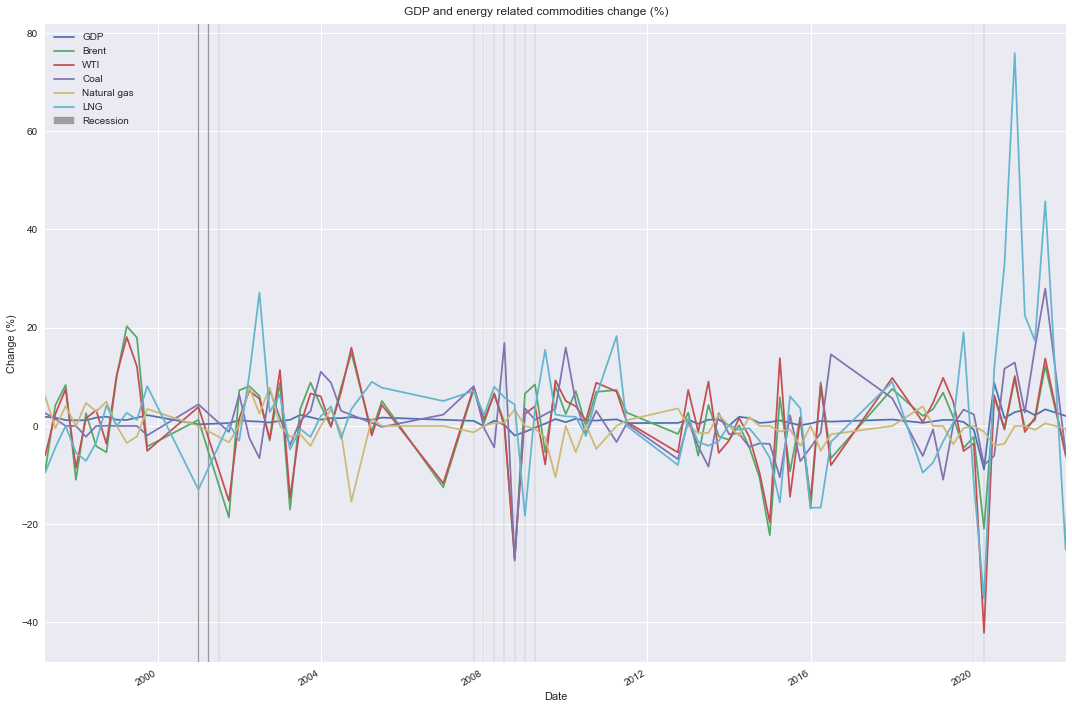

In [7]:
## Plotting data time series
fig,ax = plt.subplots()
data.plot.line(ax = ax, figsize=(15, 10), x='index')
for day in recs:
    ## Plotting indicators of United States recession
    plt.axvspan(day, day + dt.timedelta(days=1), color="grey", alpha=0.7)
## Set xlim in the start date of data 
plt.xlim('1997-04-01','2022-04-01')
plt.suptitle('GDP and energy related commodities change (%)')
ax.set(xlabel='Date', ylabel='Change (%)')
ax.legend(['GDP','Brent','WTI','Coal','Natural gas','LNG','Recession'])
plt.tight_layout()

In [8]:
## Import unemployment data
unrate = fred.get_series('UNRATE')

In [9]:
## Converting to list
data = unrate.tolist()

In [10]:
## Get standard deviation and mean of unemployment data
loc,scale = ss.norm.fit(data)
## Getting probability density function and cumulative distribution function for unemployment data
pdf = ss.norm.pdf(data, loc = loc,scale = scale)
cdf = ss.norm.cdf(data, loc = loc,scale = scale)

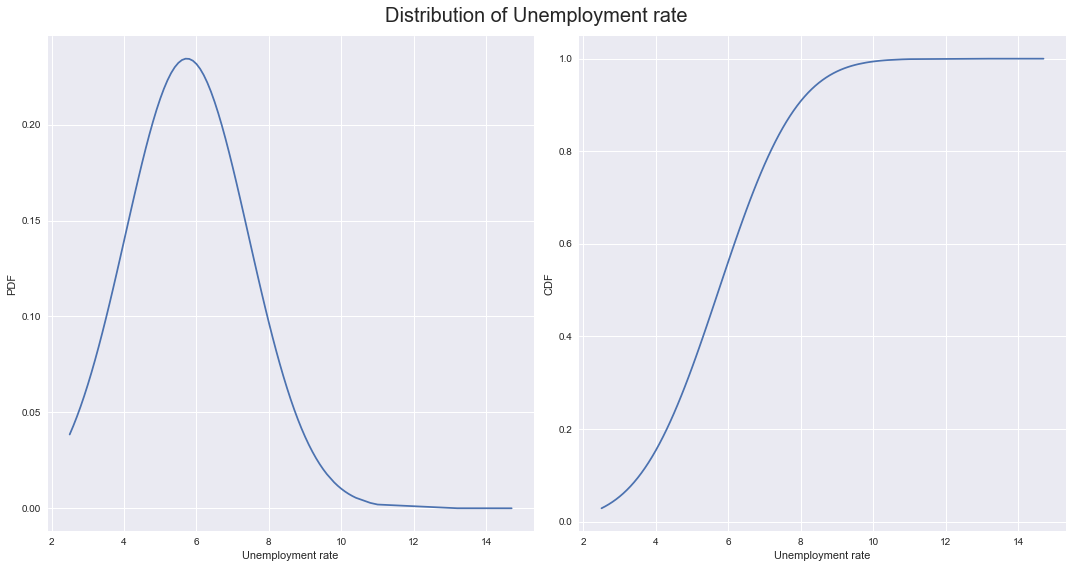

In [11]:
## Plotting distribution of unemployment data
fig,axs = plt.subplots(ncols = 2, figsize=(15, 8))
fig.suptitle("Distribution of Unemployment rate", fontsize=20)
sns.lineplot(x = data,y = pdf,ax = axs[0]).set(xlabel = "Unemployment rate", ylabel = "PDF")
sns.lineplot(x = data,y = cdf,ax = axs[1]).set( xlabel = "Unemployment rate", ylabel = "CDF")
fig.tight_layout()

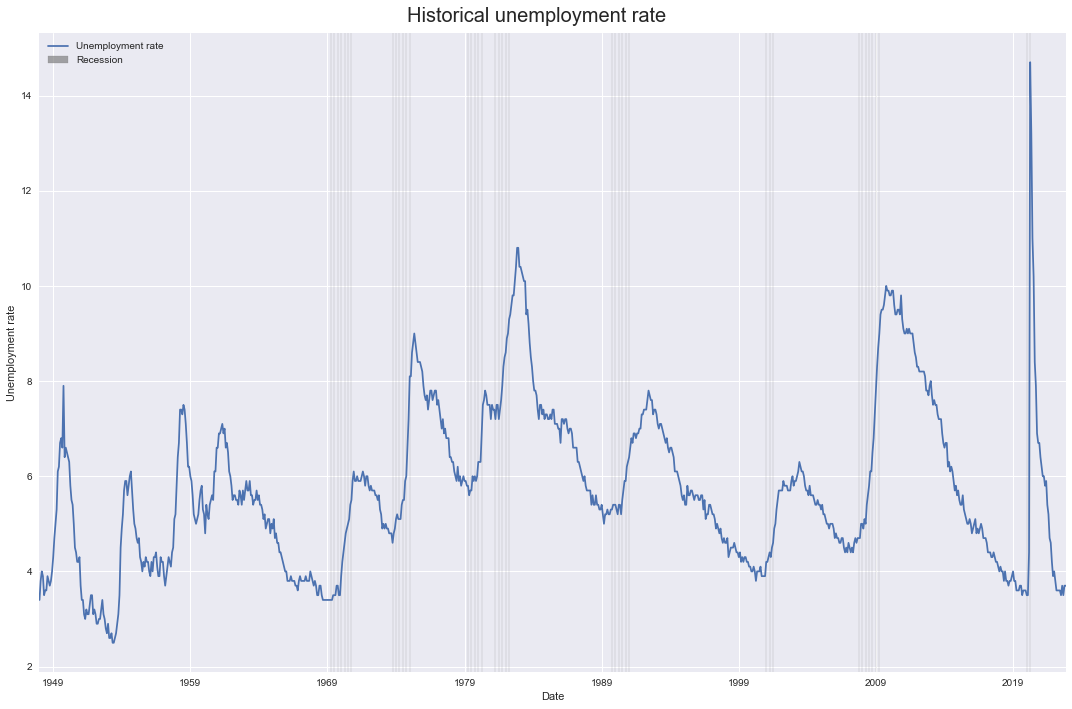

In [12]:
## Plotting time series of unemployment data
fig,ax = plt.subplots()
unrate.plot.line(ax = ax, figsize=(15, 10), x ='index', y ='unrate')
for day in recs:
    ## Plotting indicators of United States recession
    plt.axvspan(day, day + dt.timedelta(days=1), color="grey", alpha=0.7)
ax.set(xlabel='Date', ylabel='Unemployment rate')
ax.legend(['Unemployment rate','Recession'])
fig.suptitle('Historical unemployment rate', fontsize=20)
plt.tight_layout()

In [13]:
## Getting percentage change in each period of unemployment data
unrate_change = unrate.pct_change().to_frame().dropna().reset_index().rename(columns = {0:'% change'})
unrate = unrate.to_frame().reset_index().rename(columns = {0:'unrate'})
unrate = unrate.merge(unrate_change, on = 'index')
unrate.dropna(inplace = True)

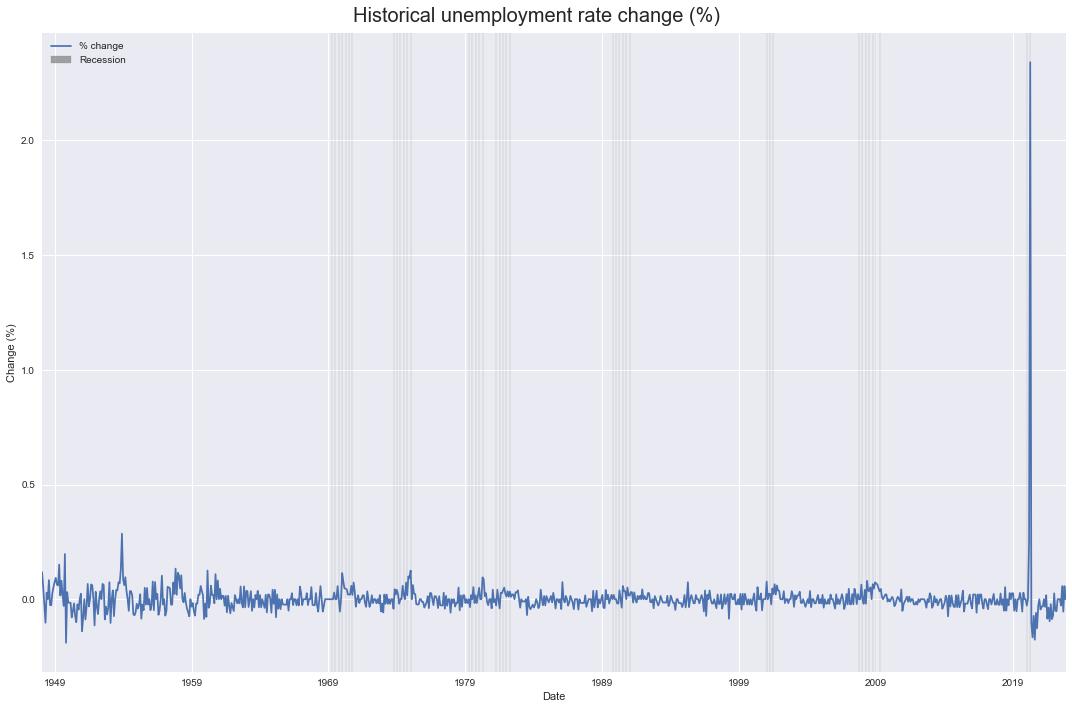

In [14]:
## Plotting percentage change in each period for unemployment data
fig,ax = plt.subplots()
unrate.plot.line(ax = ax, figsize=(15, 10), x ='index', y ='% change')
for day in recs:
    ## Plotting indicators of United States recession
    plt.axvspan(day, day + dt.timedelta(days=1), color="grey", alpha=0.7)
ax.set(xlabel='Date', ylabel='Change (%)')
ax.legend(['% change','Recession'])
fig.suptitle('Historical unemployment rate change (%)', fontsize=20)
plt.tight_layout()

In [15]:
## Importing Federal funds effective rate data
fed_funds = fred.get_series('DFF')

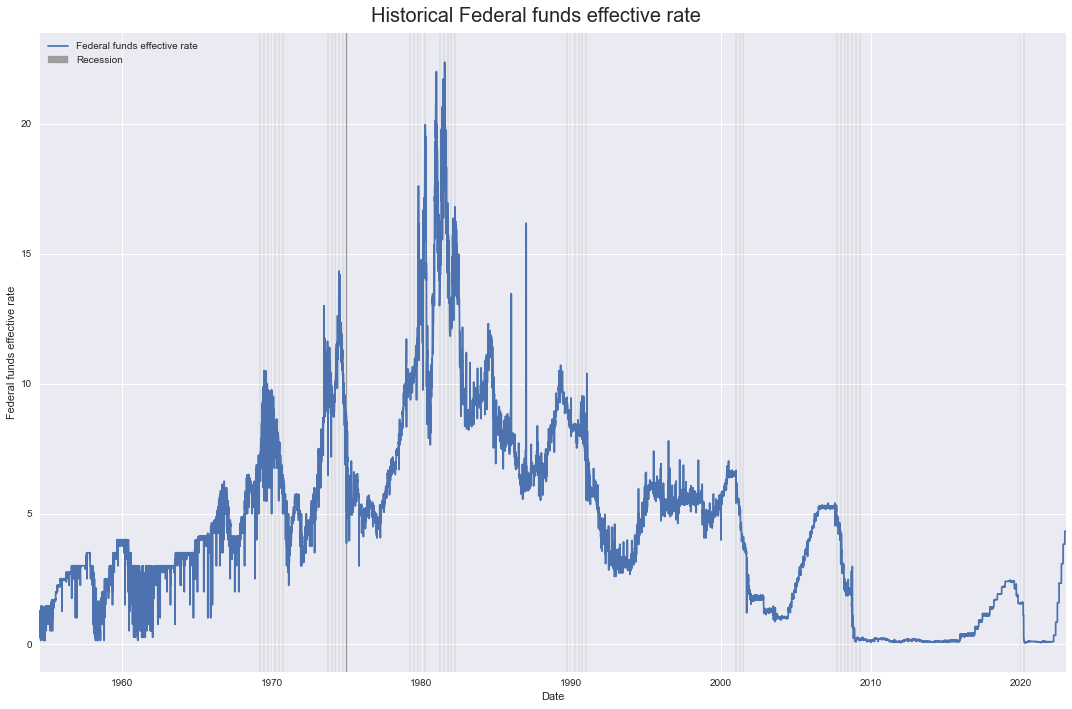

In [16]:
## Plotting Federal funds effective rate time series data
fig,ax = plt.subplots()
fed_funds.plot.line(ax = ax, figsize=(15, 10), x ='index', y ='fed_funds_rate')
for day in recs:
    ## Plotting indicators of United States recession    
    plt.axvspan(day, day + dt.timedelta(days=1), color="grey", alpha=0.7)
ax.set(xlabel='Date', ylabel='Federal funds effective rate')
ax.legend(['Federal funds effective rate','Recession'])
fig.suptitle('Historical Federal funds effective rate', fontsize=20)
plt.tight_layout()

In [17]:
## Getting percentage change in each period of Fed funds data
fed_funds_change = fed_funds.pct_change().to_frame().reset_index().dropna().rename(columns = {0:'% change'})
fed_funds = fed_funds.to_frame().reset_index().rename(columns = {0:'fed_funds_rate'})
fed_funds = fed_funds.merge(fed_funds_change, on = 'index')
fed_funds.dropna(inplace = True)

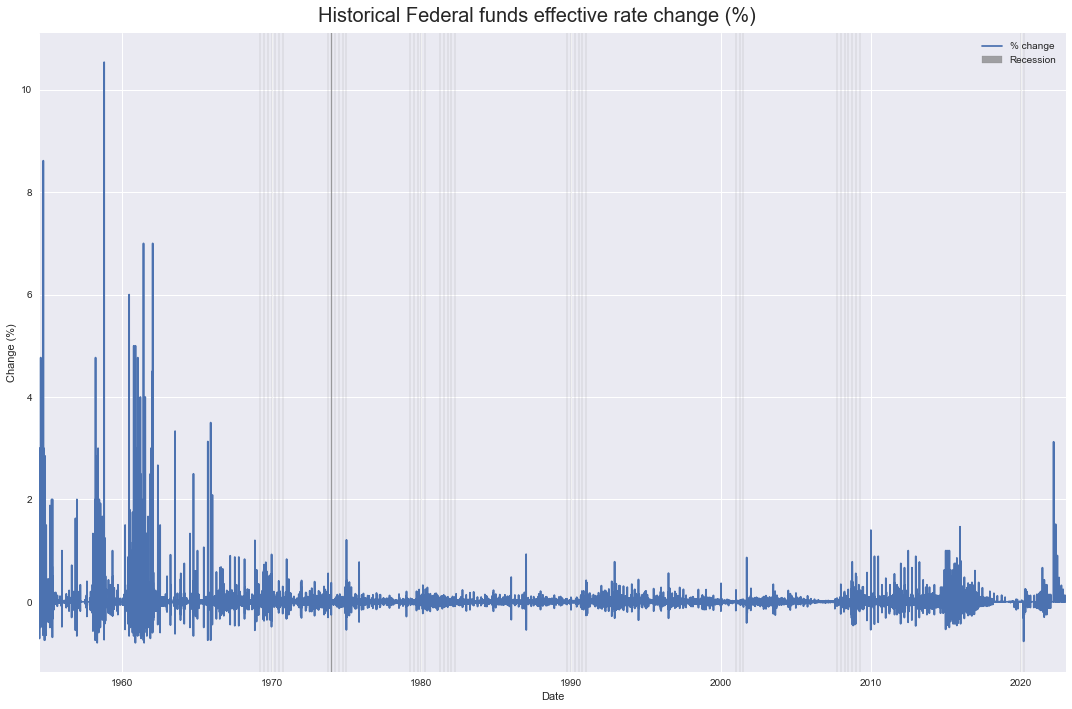

In [18]:
## Plotting percentage change in each period for Fed funds data
fig,ax = plt.subplots()
fed_funds.plot.line(ax = ax, figsize=(15, 10), x ='index', y ='% change')
for day in recs:
    ## Plotting indicators of United States recession 
    plt.axvspan(day, day + dt.timedelta(days=1), color="grey", alpha=0.7)
ax.set(xlabel='Date', ylabel='Change (%)')
ax.legend(['% change','Recession'])
fig.suptitle('Historical Federal funds effective rate change (%)', fontsize=20)
plt.tight_layout()

In [19]:
## Merging unemployment and Federal funds data
merged = unrate.merge(fed_funds, on = 'index')
merged.rename(columns = {'% change_x':'unrate_change','% change_y':'fed_funds_change'},inplace = True)

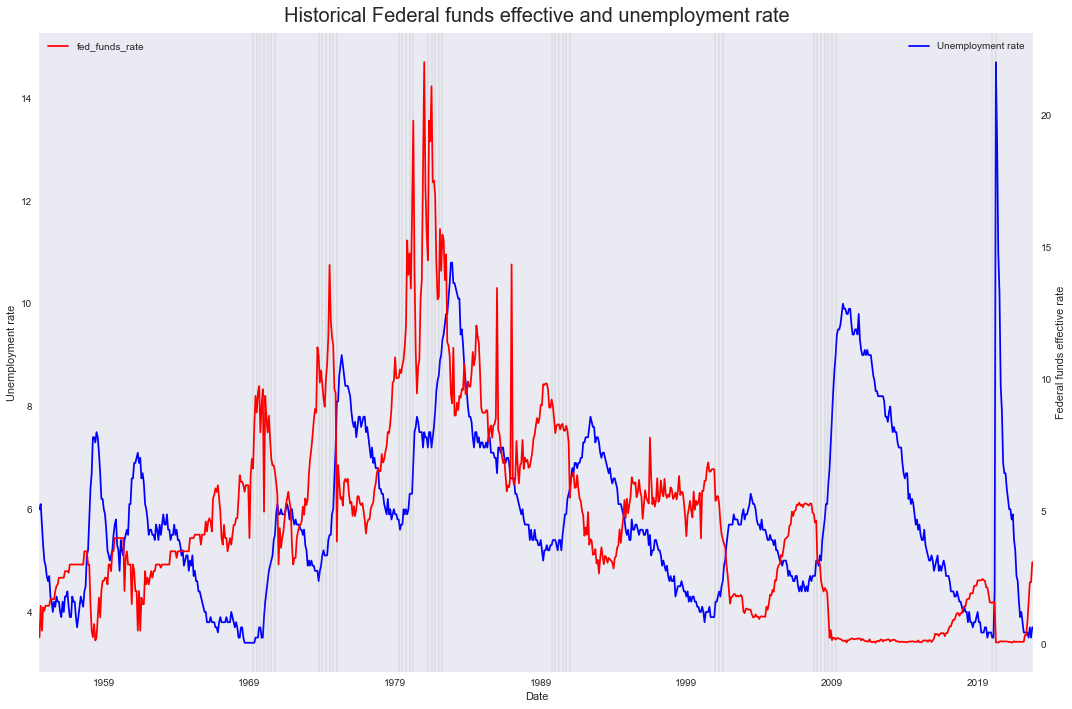

In [20]:
## Plotting time series of unemployment and Federal funds data
fig, ax = plt.subplots()
ax2 = plt.twinx()
merged.plot.line(ax = ax, figsize=(15, 10), x = 'index',y = 'unrate', color = 'b')
merged.plot.line(ax = ax2, figsize=(15, 10), x = 'index',y = 'fed_funds_rate', color = 'r')
for day in recs:
    ## Plotting indicators of United States recession 
    plt.axvspan(day, day + dt.timedelta(days=1), color="grey", alpha=0.7)
ax.set(xlabel='Date', ylabel='Unemployment rate')
ax2.set(ylabel='Federal funds effective rate')
ax.grid(None)
ax2.grid(None)
ax.legend(['Unemployment rate','Federal funds effective rate','Recession'])
fig.suptitle('Historical Federal funds effective and unemployment rate', fontsize=20)
plt.tight_layout()

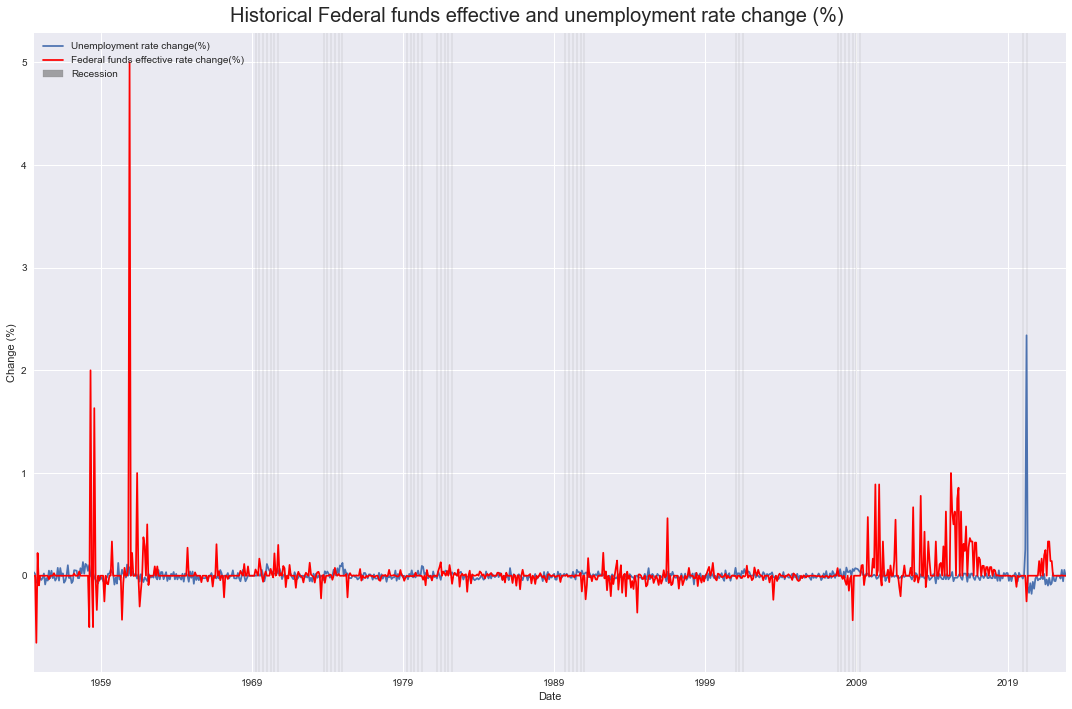

In [21]:
## Plotting time series of unemployment and Federal funds percentage change
fig, ax = plt.subplots()
merged.plot.line(ax = ax, figsize=(15, 10), x = 'index', y ='unrate_change')
merged.plot.line(ax = ax, figsize=(15, 10), x = 'index',y = 'fed_funds_change', color = 'r')
for day in recs:
    ## Plotting indicators of United States recession
    plt.axvspan(day, day + dt.timedelta(days=1), color="grey", alpha=0.7)
ax.legend(loc = 2)
ax.set(xlabel='Date', ylabel='Change (%)')
ax.legend(['Unemployment rate change(%)','Federal funds effective rate change(%)','Recession'])
fig.suptitle('Historical Federal funds effective and unemployment rate change (%)', fontsize=20)
plt.tight_layout()

In [22]:
## Importing United States CPI data
cpi = fred.get_series('CPALTT01USM657N').dropna().to_frame().reset_index().rename(columns = {0:'cpi'})

In [23]:
## Converting to list
data = cpi['cpi'].tolist()

In [24]:
## Getting standard deviation and mean of CPI data
loc,scale = ss.norm.fit(data)
## Getting probability density function and cumulative distribution function for CPI data
pdf = ss.norm.pdf(data, loc = loc,scale = scale)
cdf = ss.norm.cdf(data, loc = loc,scale = scale)

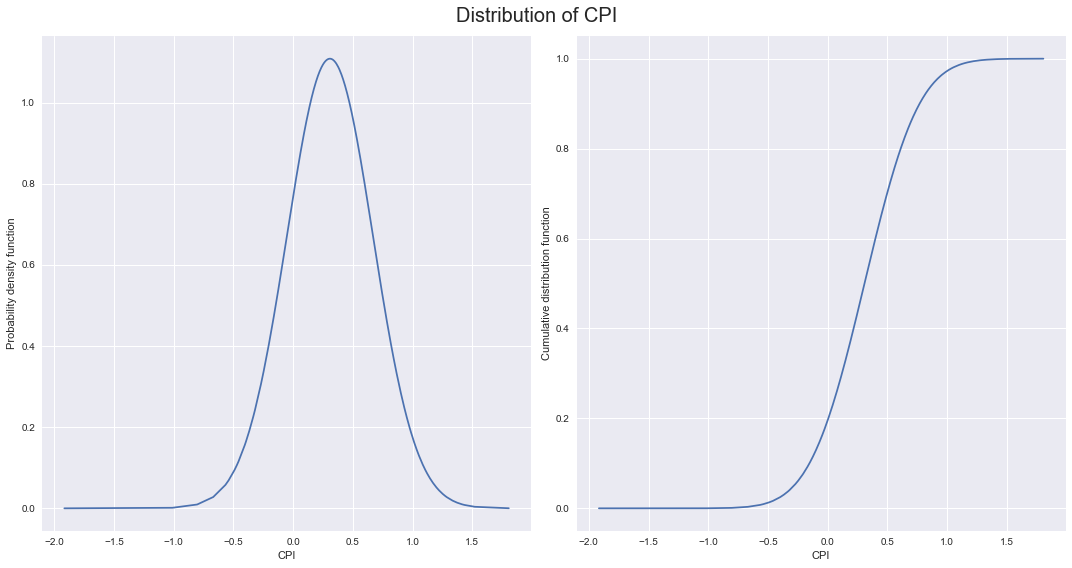

In [25]:
## Plotting distribution of CPI data
fig,axs = plt.subplots(ncols = 2, figsize=(15, 8))
fig.suptitle("Distribution of CPI", fontsize=20)
sns.lineplot(x = data,y = pdf,ax = axs[0]).set(xlabel = "CPI", ylabel = "Probability density function")
sns.lineplot(x = data,y = cdf,ax = axs[1]).set( xlabel = "CPI", ylabel = "Cumulative distribution function")
fig.tight_layout()

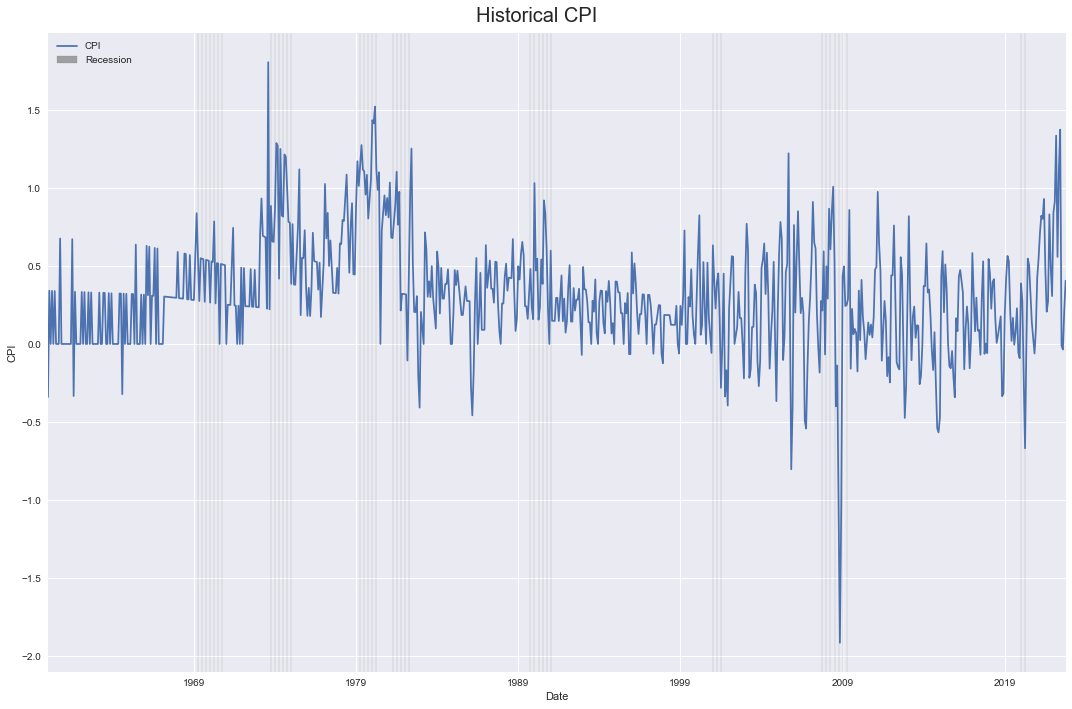

In [26]:
## Plotting CPI time series data
fig,ax = plt.subplots()
cpi.plot.line(ax = ax, figsize=(15, 10), x ='index', y ='cpi')
for i,day in enumerate(recs):
    ## Plotting indicators of United States recession
    plt.axvspan(day, day + dt.timedelta(days=1), color="grey", alpha=0.7)
ax.set(xlabel='Date', ylabel='CPI')
ax.legend(['CPI','Recession'])
fig.suptitle('Historical CPI', fontsize=20)
plt.tight_layout()

In [27]:
## Merging unemployment, fed funds and CPI data
data = unrate.merge(cpi, on = 'index').merge(fed_funds, on = 'index')
data.rename(columns = {'% change_x':'unrate_change','% change_y':'fed_funds_change'},inplace = True)

In [28]:
## Creating decade column
data['year'] = pd.DatetimeIndex(data['index']).year
yearlist = []
for x in data['year']:
    century = x / 100
    year = x - (int(century) * 100)
    decade = year / 10
    yearlist.append(str(x)[:2] + str(int(decade)) + '0')
data['decade'] = yearlist

In [29]:
## Group data by decade
decade_groups = data.groupby('decade')

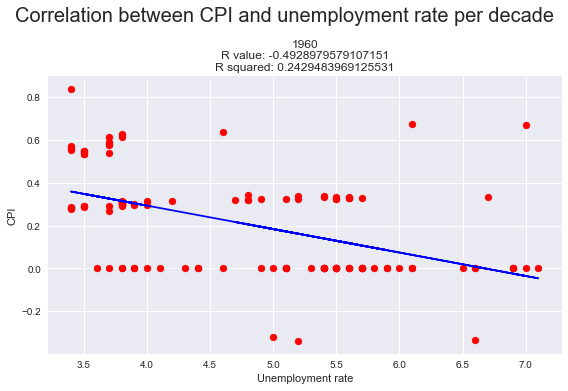

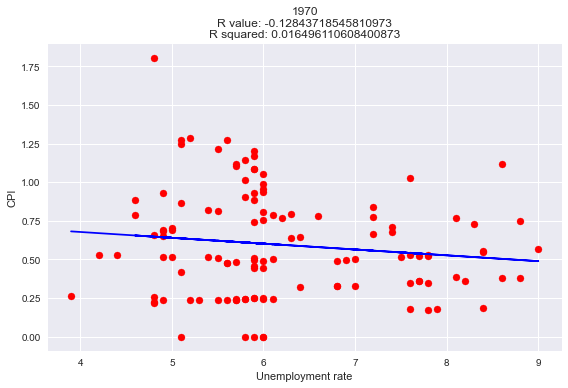

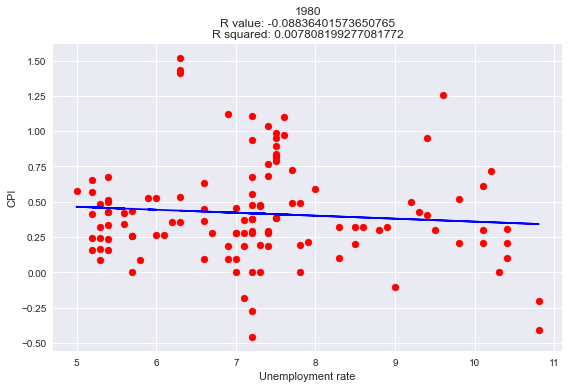

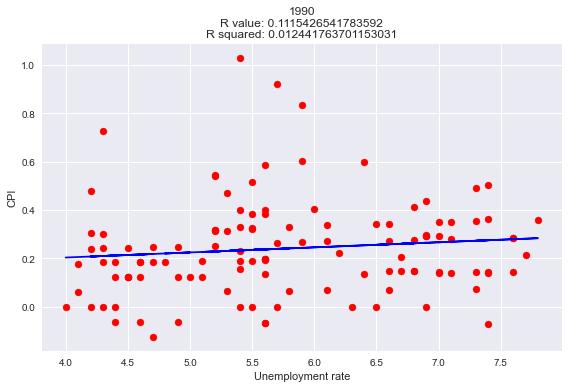

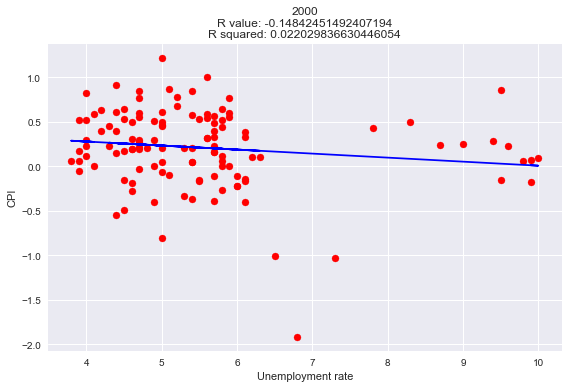

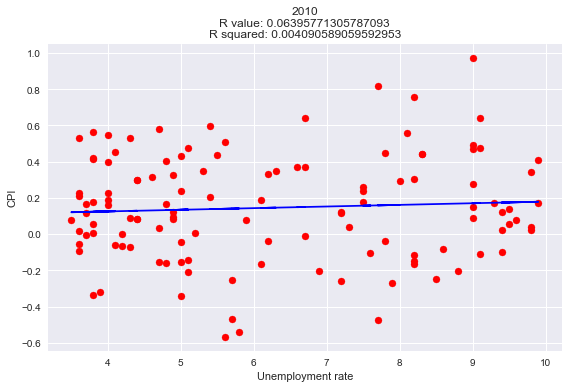

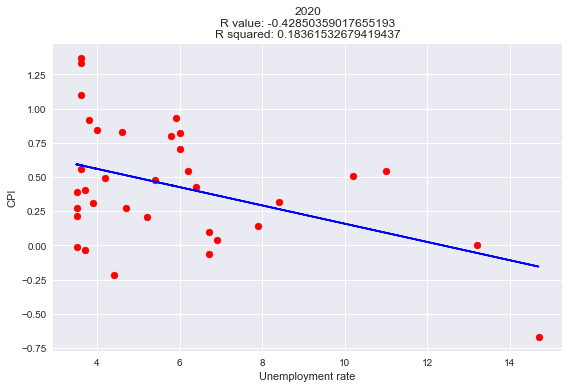

In [30]:
fig,ax = plt.subplots()
fig.suptitle('Correlation between CPI and unemployment rate per decade', fontsize=20)
## For loop of each decade
for name, group in decade_groups:
    ## Linear regression between unemployment and CPI
    result = ss.linregress(x = group['unrate'], y = group['cpi'])
    plt.scatter(x = group['unrate'],y = group['cpi'],c = 'r')
    x = group['unrate'].to_numpy()
    y = result.intercept + result.slope * x
    plt.plot(x, y, color = 'b')
    plt.xlabel('Unemployment rate')
    plt.ylabel('CPI')
    plt.title(name + '\n' + 'R value: ' + str(result.rvalue) + '\n' + 'R squared: ' + str(result.rvalue ** 2),fontsize = 12)
    plt.tight_layout()
    plt.show()

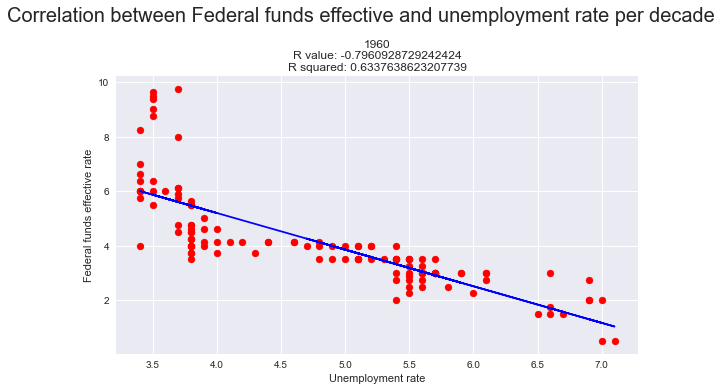

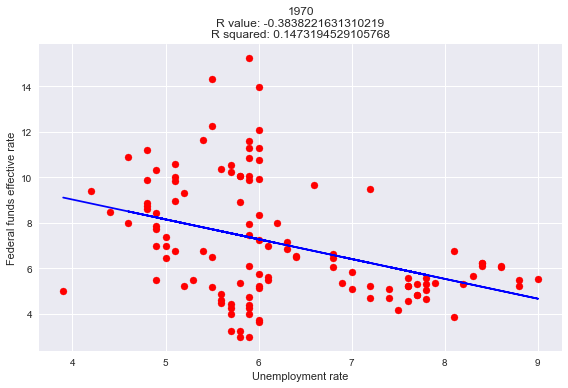

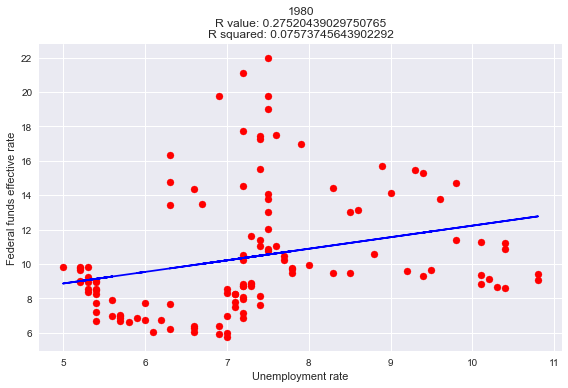

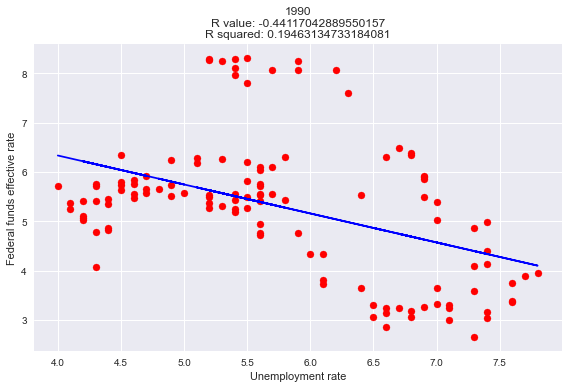

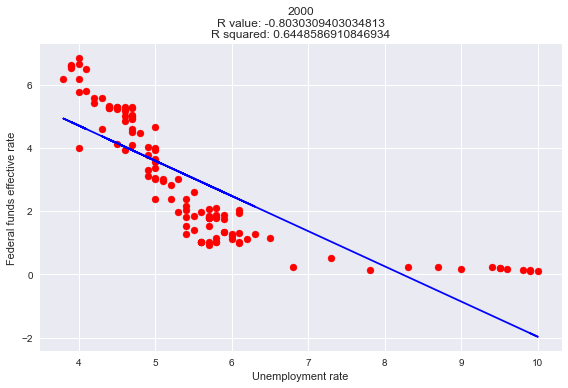

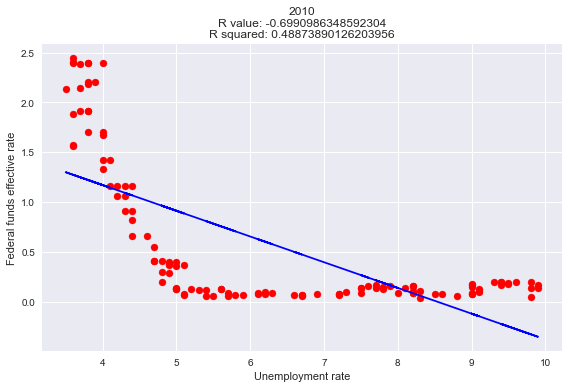

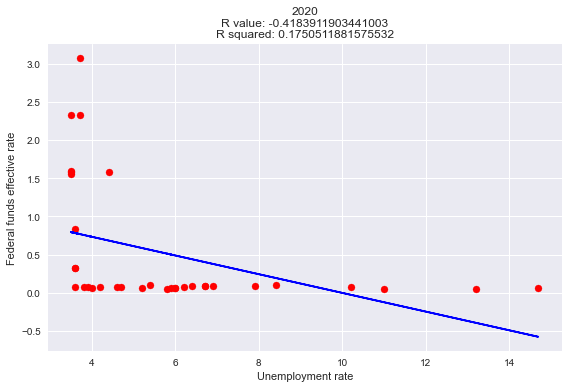

In [31]:
fig,ax = plt.subplots()
fig.suptitle('Correlation between Federal funds effective and unemployment rate per decade', fontsize=20)
## For loop of each decade
for name, group in decade_groups:
    ## Linear regression between unemployment and Federal funds effective rate
    result = ss.linregress(x = group['unrate'], y = group['fed_funds_rate'])
    plt.scatter(x = group['unrate'],y = group['fed_funds_rate'],c = 'r')
    x = group['unrate'].to_numpy()
    y = result.intercept + result.slope * x
    plt.plot(x, y, color = 'b')
    plt.xlabel('Unemployment rate')
    plt.ylabel('Federal funds effective rate')
    plt.title(name + '\n' + 'R value: ' + str(result.rvalue) + '\n' + 'R squared: ' + str(result.rvalue ** 2),fontsize = 12)
    plt.tight_layout()
    plt.show()

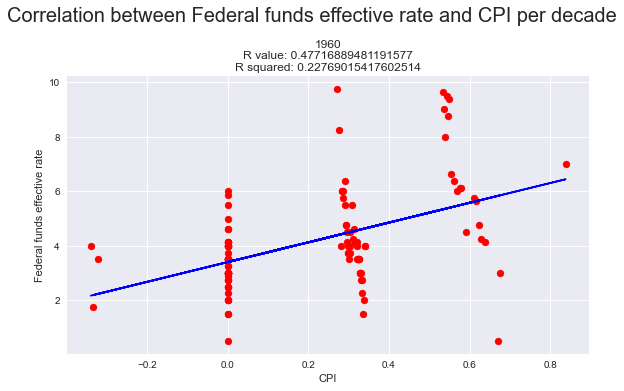

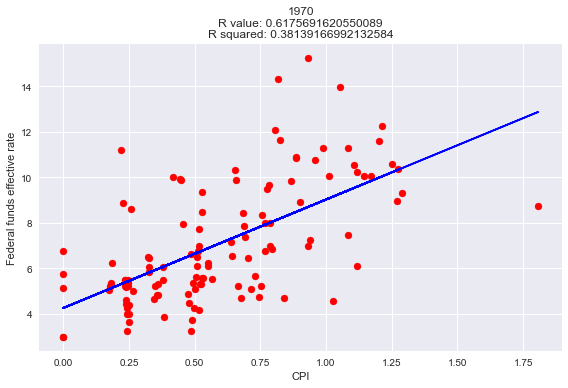

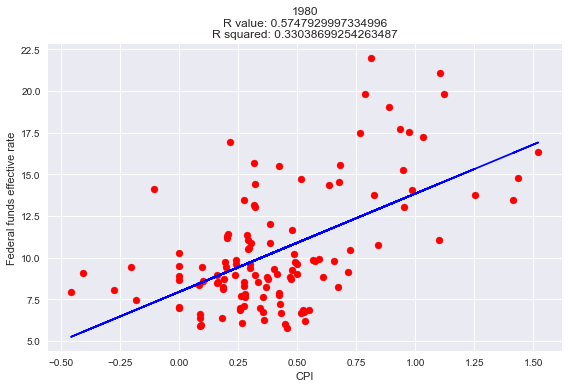

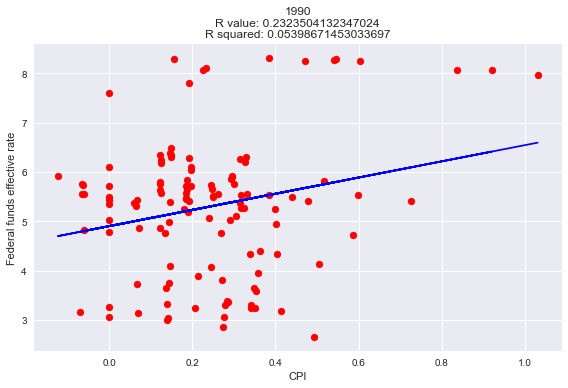

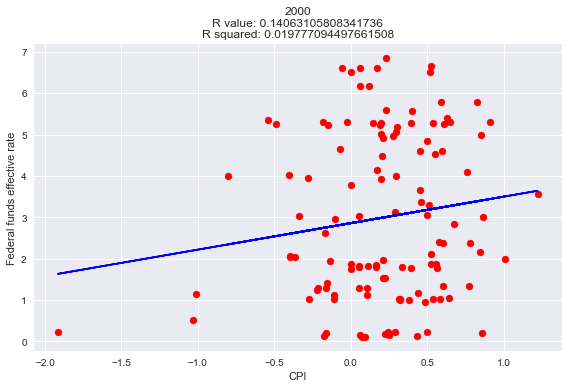

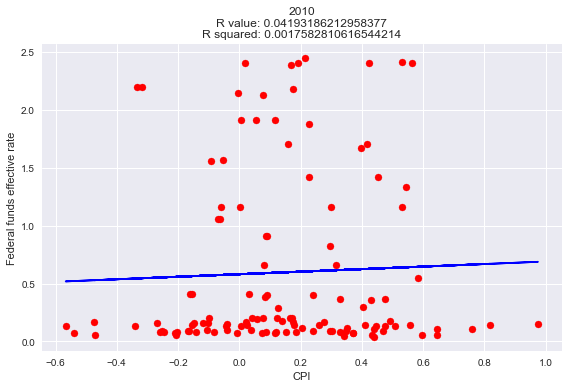

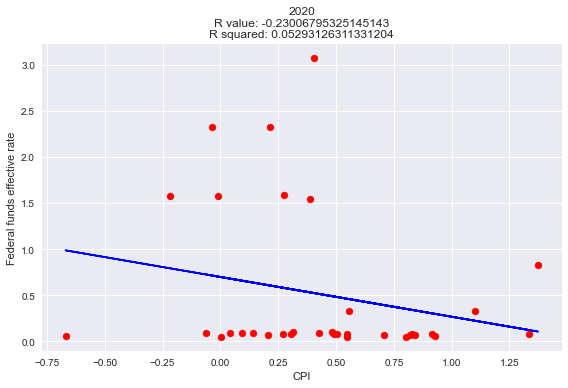

In [32]:
fig,ax = plt.subplots()
fig.suptitle('Correlation between Federal funds effective rate and CPI per decade', fontsize=20)
## For loop of each decade
for name, group in decade_groups:
    ## Linear regression between CPI and Federal funds effective rate
    result = ss.linregress(x = group['cpi'], y = group['fed_funds_rate'])
    plt.scatter(x = group['cpi'],y = group['fed_funds_rate'],c = 'r')
    x = group['cpi'].to_numpy()
    y = result.intercept + result.slope * x
    plt.plot(x, y, color = 'b')
    plt.xlabel('CPI')
    plt.ylabel('Federal funds effective rate')
    plt.title(name + '\n' + 'R value: ' + str(result.rvalue) + '\n' + 'R squared: ' + str(result.rvalue ** 2),fontsize = 12)
    plt.tight_layout()
    plt.show()